In [49]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [50]:
# 加载数据
df = pd.read_csv('HR_comma_sep.csv')

# 显示数据
print(df.head())
level = df['satisfaction_level']
evaluation = df['last_evaluation']
project = df['number_project']
average_monthly_hours = df['average_montly_hours']
time_spend_company = df['time_spend_company']
work_accident = df['Work_accident']
left = df['left']
promotion = df['promotion_last_5years']
department = df['sales']
salary = df['salary']



   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [51]:
## 数据预处理

### 将sales转换为数字
department = df['sales'].map({'sales': 1, 'accounting': 2, 'hr': 3, 'technical': 4, 'support': 5, 'management': 6, 'IT': 7, 'product_mng': 8, 'marketing': 9, 'RandD': 10})
salary = df['salary'].map({'low': 1, 'medium': 2, 'high': 3})

X_tensors = torch.tensor([level, evaluation, project, average_monthly_hours, time_spend_company, work_accident, promotion, department, salary], dtype=torch.float32).T
Y_tensors = torch.tensor(left, dtype=torch.float32).view(-1, 1)


In [52]:
##定义模型
class linear(nn.Module):
    def __init__(self, input_size):
        super(linear, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

In [53]:
import torch.optim as optim

model = linear(input_size=9)

#定义损失函数
criterion = nn.MSELoss()

#定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.00001) #学习率

In [59]:
device = torch.device('cuda')

# 将模型移动到GPU
model = model.to(device)

# 将数据移动到GPU
X_tensors = X_tensors.to(device)
y_tensor = y_tensor.to(device)

## 训练
num_epochs = 10000
losses = []
for epoch in range(num_epochs):
    outputs = model(X_tensors).squeeze()
    loss = criterion(outputs, y_tensor.squeeze()) #修整矩阵维度
    
    optimizer.zero_grad()
    loss.backward() # 反向传播
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/100000], Loss: 0.2484
Epoch [2000/100000], Loss: 0.2448
Epoch [3000/100000], Loss: 0.2414
Epoch [4000/100000], Loss: 0.2384
Epoch [5000/100000], Loss: 0.2356
Epoch [6000/100000], Loss: 0.2331
Epoch [7000/100000], Loss: 0.2307
Epoch [8000/100000], Loss: 0.2285
Epoch [9000/100000], Loss: 0.2265
Epoch [10000/100000], Loss: 0.2247
Epoch [11000/100000], Loss: 0.2229
Epoch [12000/100000], Loss: 0.2213
Epoch [13000/100000], Loss: 0.2198
Epoch [14000/100000], Loss: 0.2184
Epoch [15000/100000], Loss: 0.2171
Epoch [16000/100000], Loss: 0.2159
Epoch [17000/100000], Loss: 0.2147
Epoch [18000/100000], Loss: 0.2136
Epoch [19000/100000], Loss: 0.2126
Epoch [20000/100000], Loss: 0.2116
Epoch [21000/100000], Loss: 0.2107
Epoch [22000/100000], Loss: 0.2098
Epoch [23000/100000], Loss: 0.2089
Epoch [24000/100000], Loss: 0.2081
Epoch [25000/100000], Loss: 0.2074
Epoch [26000/100000], Loss: 0.2067
Epoch [27000/100000], Loss: 0.2059
Epoch [28000/100000], Loss: 0.2053
Epoch [29000/100000], Loss: 0

In [60]:
#输入分别为 [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, sales, salary]
new_house_features = torch.tensor([0.38,0.53,2,157,3,0,0,1,1]).cuda()

with torch.no_grad():
    predicted_price = model(new_house_features).squeeze().item()
    print("预测离职:", predicted_price)


预测离职: 0.1564018428325653


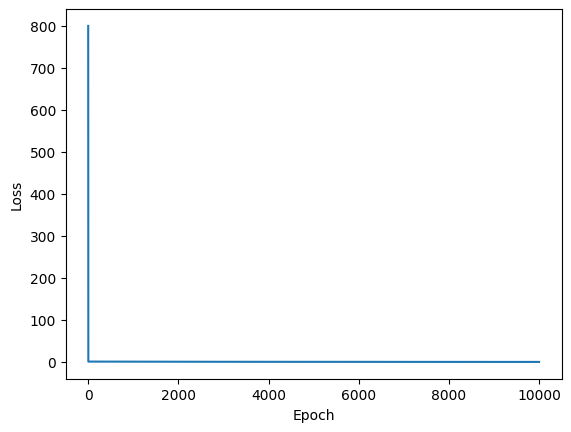

In [56]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()